In [2]:
import numpy as np
import plotly.graph_objects as go
import plotly.colors as pc
import matplotlib.pyplot as plt
from scipy.integrate import quad

import matplotlib.pyplot as plt


plt.style.use('ggplot')
plt.rc('figure', figsize=(15, 6))


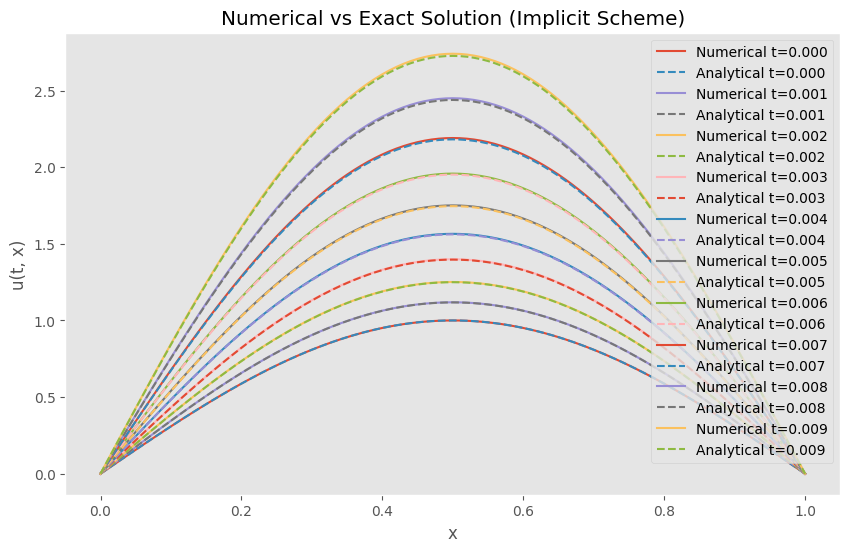

In [3]:
T = 0.1
N = 100
M = 100
x_min = 0
x_max = 1

b = 20.

def f_0(x):
    return 5* x * x * np.sin(np.pi * x) * (x <= 1)
    
def exact_solution(t, x):
    if isinstance(t, float):
        return np.exp(-(np.pi ** 2 - b) * t) * np.sin(np.pi * x)
    return np.exp(-(np.pi ** 2 - b) * t[:, None]) * np.sin(np.pi * x[None, :])

h = (x_max - x_min) / M
x = np.linspace(x_min, x_max, M + 1)

tau = T / N

u_t_x = np.zeros(shape = (N + 1, M + 1))
u_t_x[0, :] = exact_solution(0., x) # 

for i in range(1, N + 1):
    A = np.zeros(shape = (M - 1, M - 1))
    A[0, 0] = 1 / tau - b + 2 /(h ** 2)
    A[0, 1] = - 1 / h ** 2

    for j in range(1, M - 2):
        A[j, j - 1] = - 1 / h ** 2
        A[j, j] = 1 / tau - b + 2 / (h ** 2)
        A[j, j + 1] = - 1 / h ** 2

    A[M - 2, M - 3] = - 1 / h ** 2
    A[M - 2, M - 2] = 1 / tau - b + 2 / (h ** 2)

    f_t_x = 1 / tau * u_t_x[i - 1, :]
    u_t_x[i, 1:-1] = np.linalg.solve(A, f_t_x[1: -1])

t_grid = np.linspace(0, T, N + 1)
u_exact = exact_solution(t_grid, x)

indices = np.linspace(0,N-1, 10, dtype=int)

plt.figure(figsize=(10, 6))
plt.title("Numerical vs Exact Solution (Implicit Scheme)")
for i, idx in enumerate(indices):
    plt.plot(x, u_t_x[idx,:], label=f"Numerical t={t_grid[i]:.3f}")
    plt.plot(x, u_exact[idx, :], "--", label=f"Analytical t={t_grid[i]:.3f}")
plt.xlabel("x")
plt.ylabel("u(t, x)")
plt.legend()
plt.grid()
plt.show()


In [4]:
k = 3
if(np.pi ** 2 * k ** 2 / 4 > b):
    print("Нам подходит")

Нам подходит


In [5]:
x_min = 0
x_max = 3

def w_01(x):
    return 5 * x * x * np.sin(np.pi * x) * (x >= 0) * (x <= 1)

def e_1(x):
    return np.sin(np.pi * x / 3) * (x > 1) * (x <= 3)
def e_2(x):
    return np.sin(np.pi * x * 2 / 3) * (x > 1) * (x <= 3)
def e_3(x):
    return np.sin(np.pi * x) * (x > 1) * (x <= 3)

def sin_pi_x_3(x):
    return np.sin(np.pi * x / 3)
def sin_pi_x_23(x):
    return np.sin(np.pi * x * 2 / 3)
def sin_pi_x(x):
    return np.sin(np.pi * x)

def scalar_prod(f, g, a = x_min, b = x_max):
    integral, err = quad(lambda x: f(x) * g(x), a, b)
    if err > 1e-7:
        print(f"scalar_prod err = {err:.2e}")
    return integral

In [6]:
A = np.array([[scalar_prod(e_1, sin_pi_x_3), scalar_prod(e_2, sin_pi_x_3),scalar_prod(e_3, sin_pi_x_3)],
              [scalar_prod(e_1, sin_pi_x_23), scalar_prod(e_2, sin_pi_x_23), scalar_prod(e_3, sin_pi_x_23)],
              [scalar_prod(e_1, sin_pi_x), scalar_prod(e_2, sin_pi_x),scalar_prod(e_3, sin_pi_x)]
              ])
f = -np.array([scalar_prod(w_01, sin_pi_x_3), scalar_prod(w_01, sin_pi_x_23), scalar_prod(w_01, sin_pi_x)])

c1, c2, c3 = np.linalg.solve(A, f)

print(f"C_1 = {c1}, C_2 = {c2}, C3 = {c3}")

C_1 = -3.046909873789739, C_2 = -4.532669752590973, C3 = -3.900689799518202


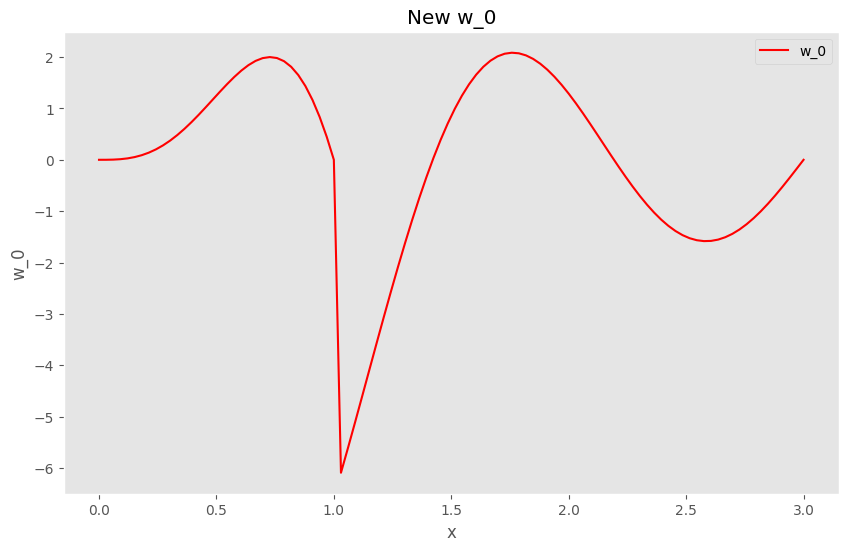

In [7]:
def w_0(x):
    return w_01(x) + c1 * e_1(x) + c2 * e_2(x) + c3 * e_3(x)

x = np.linspace(x_min, x_max, 100)

plt.figure(figsize=(10, 6))
plt.title("New w_0")
plt.xlabel("x")
plt.ylabel("w_0")
plt.plot(x, w_0(x),color = 'red', label ="w_0")
plt.legend()
plt.grid()

In [8]:
T = 0.1
N = 10
M = 100
x_min = 0
x_max = 3

b = np.pi ** 2 + 0.1

def w_0(x):
    return w_01(x) + c1 * e_1(x) + c2 * e_2(x) + c3 * e_3(x)

h = (x_max - x_min) / M
x = np.linspace(x_min, x_max, M + 1)

tau = T / N

u_t_x = np.zeros(shape = (N + 1, M + 1))
u_t_x[0, :] = w_0(x)

for i in range(1, N + 1):
    A = np.zeros(shape = (M - 1, M - 1))
    A[0, 0] = 1 / tau - b + 2 /(h ** 2)
    A[0, 1] = - 1 / h ** 2
    for j in range(1, M - 2):
        A[j, j - 1] = - 1 / h ** 2
        A[j, j] = 1 / tau - b + 2 / (h ** 2)
        A[j, j + 1] = - 1 / h ** 2
    A[M - 2, M - 3] = - 1 / h ** 2
    A[M - 2, M - 2] = 1 / tau - b + 2 / (h ** 2)

    f_t_x = 1 / tau * u_t_x[i - 1, :]
    u_t_x[i, 1:-1] = np.linalg.solve(A, f_t_x[1: -1])

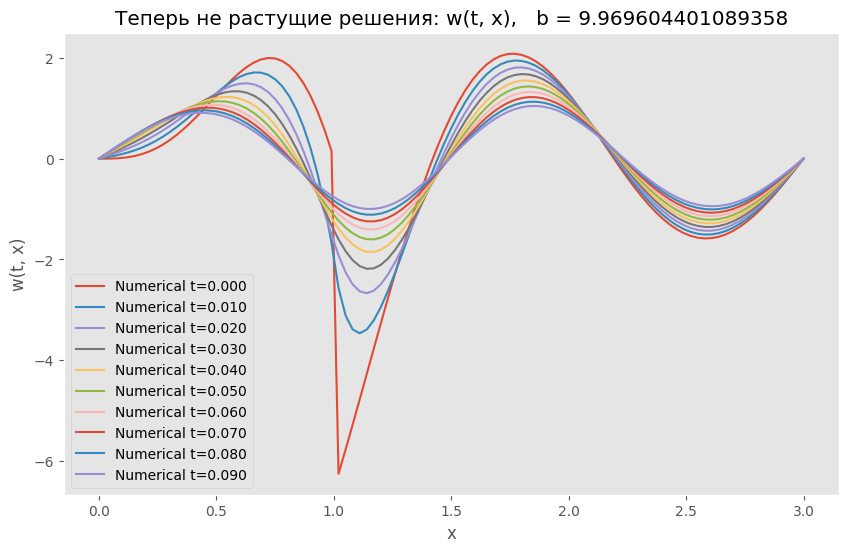

In [9]:
t_grid = np.linspace(0, T, N + 1)
u_exact = exact_solution(t_grid, x)

indices = np.linspace(0,N-1, 10, dtype=int)

plt.figure(figsize=(10, 6))
plt.title(f"Теперь не растущие решения: w(t, x),   b = {b}")
for i, idx in enumerate(indices):
    plt.plot(x, u_t_x[idx,:], label=f"Numerical t={t_grid[i]:.3f}")
plt.xlabel("x")
plt.ylabel("w(t, x)")
plt.legend()
plt.grid()
plt.show()
